In [1]:
# Installing dependencies
!pip install -q pandas matplotlib wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading CPython Issues

In [3]:
df = pd.read_csv("https://bugs.python.org/issue?@action=export_csv&@columns=title,id,activity,status&@sort=activity&@group=priority&@filter=status,message_count&@pagesize=50&@startwith=0&status=1&message_count=1")
df.head(3)

,title,id,activity,status
0,Implement support for validation of pattern ma...,43897,2021-04-22.13:37:12,1
1,"PEP 3121, 384 Refactoring applied to ossaudio ...",15735,2012-11-08.13:25:57,1
2,"PEP 3121, 384 Refactoring applied to testcapi ...",15673,2012-11-08.13:35:51,1


In [4]:
df.columns

Index(['title', 'id', 'activity', 'status'], dtype='object')

In [5]:
df.size

5356

In [6]:
df.sort_values(by='title')

,title,id,activity,status
189,"""./configure --enable-optimizations && make in...",29370,2017-01-25.22:17:39,1
1186,"""Emulating callable objects"" documentation mis...",31472,2021-03-14.18:04:39,1
1144,"""_weakrefset.py"", line 56: IndexError: pop fro...",43262,2021-02-19.06:47:59,1
1195,"""connect_read_pipe"" raises errors on Windows f...",43528,2021-03-17.12:43:44,1
607,"""pdb.Pdb(skip=…).set_trace()"" should always st...",38806,2019-11-15.00:29:14,1
...,...,...,...,...
818,zoneinfo gives incorrect dst() in Europe/Madri...,40931,2020-06-09.20:21:28,1
817,zoneinfo gives incorrect dst() in Pacific/Raro...,40930,2020-06-09.20:09:18,1
819,zoneinfo may give incorrect dst() in Europe/Mi...,40933,2020-06-09.20:57:31,1
1068,zoneinfo uses locale depending functions for p...,42676,2020-12-18.18:09:32,1


In [7]:
# help("modules")
raw_list_modules = """
ConfigSpace         bleach              jupyter_client      retrying
Cython              blinker             jupyter_core        rlcompleter
IPython             bokeh               jupyter_packaging   rmagic
OpenSSL             boto3               jupyter_server      rpy2
PIL                 botocore            jupyter_telemetry   ruamel_yaml
__future__          bottleneck          jupyterhub          runpy
_abc                brotli              jupyterlab          s3transfer
_ast                bs4                 jupyterlab_pygments sacrebleu
_asyncio            builtins            jupyterlab_server   sacremoses
_bisect             bz2                 jupyterlab_widgets  sched
_blake2             cProfile            jwt                 scipy
_bootlocale         cached_property     kaggle              seaborn
_bz2                caffe2              keyword             secrets
_cffi_backend       calendar            kiwisolver          select
_codecs             catboost            lib2to3             selectors
_codecs_cn          certifi             libfuturize         send2trash
_codecs_hk          certipy             libpasteurize       sentencepiece
_codecs_iso2022     cffi                lightgbm            setuptools
_codecs_jp          cgi                 linecache           shelve
_codecs_kr          cgitb               llvmlite            shlex
_codecs_tw          chardet             locale              shutil
_collections        chunk               locket              signal
_collections_abc    click               logging             simplegeneric
_compat_pickle      cloudpickle         lzma                site
_compression        cmath               mailbox             six
_contextvars        cmd                 mailcap             skimage
_crypt              code                mako                sklearn
_csv                codecs              mamba               slugify
_ctypes             codeop              markupsafe          smtpd
_ctypes_test        collections         marshal             smtplib
_curses             colorsys            math                sndhdr
_curses_panel       compileall          matplotlib          sniffio
_datetime           concurrent          mccabe              socket
_decimal            conda               mimetypes           socketserver
_distutils_hack     conda_env           minio               socks
_dummy_thread       conda_package_handling mistune             sockshandler
_elementtree        configparser        mmap                sortedcontainers
_functools          contextlib          mock                soupsieve
_hashlib            contextvars         modulefinder        spwd
_heapq              copy                mpmath              sqlalchemy
_imp                copyreg             msgpack             sqlite3
_io                 crypt               multiprocessing     sre_compile
_json               cryptography        mxnet               sre_constants
_locale             csv                 nacl                sre_parse
_lsprof             ctypes              nbclassic           ssl
_lzma               curl                nbclient            stat
_markupbase         curses              nbconvert           statistics
_md5                cv2                 nbformat            statsmodels
_multibytecodec     cycler              nest_asyncio        storemagic
_multiprocessing    cython              netrc               string
_opcode             cythonmagic         networkx            stringprep
_operator           cytoolz             nis                 struct
_osx_support        d8                  nltk                subprocess
_pickle             dask                nntplib             sunau
_plotly_future_     dataclasses         notebook            symbol
_plotly_utils       datetime            ntpath              sympy
_posixshmem         dateutil            nturl2path          sympyprinting
_posixsubprocess    dbm                 numba               symtable
_py_abc             decimal             numbers             sys
_pydecimal          decorator           numexpr             sysconfig
_pyio               decord              numpy               syslog
_pyrsistent_version defusedxml          nvidia_smi          tables
_pytest             deprecation         oauthlib            tabnanny
_queue              difflib             olefile             tarfile
_random             dill                opcode              tblib
_remote_module_non_sriptable dis                 openml              telnetlib
_rinterface_cffi_abi distributed         openpyxl            tempfile
_rinterface_cffi_api distutils           operator            tensorboardX
_ruamel_yaml        dmlc_tracker        optparse            terminado
_sha1               doctest             os                  termios
_sha256             dummy_threading     ossaudiodev         test
_sha3               easy_install        packaging           test_data
_sha512             editor              pamela              test_pycosat
_signal             email               pandas              testpath
_sitebuiltins       encodings           pandocfilters       tests
_socket             ensurepip           paramiko            text_unidecode
_sqlite3            entrypoints         parser              textwrap
_sre                enum                parso               this
_ssl                errno               partd               threading
_stat               et_xmlfile          past                threadpoolctl
_statistics         fastai              pathlib             tifffile
_string             fastprogress        patsy               time
_strptime           faulthandler        pdb                 timeit
_struct             fcntl               pexpect             tkinter
_symtable           filecmp             pickle              tlz
_sysconfigdata__linux_x86_64-linux-gnu fileinput           pickleshare         token
_sysconfigdata_aarch64_conda_cos7_linux_gnu flake8              pickletools         tokenize
_sysconfigdata_aarch64_conda_linux_gnu fnmatch             pip                 tokenizers
_sysconfigdata_arm64_apple_darwin20_0_0 formatter           pipes               toml
_sysconfigdata_i686_conda_cos6_linux_gnu fractions           pkg_resources       tomlkit
_sysconfigdata_i686_conda_linux_gnu fsspec              pkgutil             toolz
_sysconfigdata_powerpc64le_conda_cos7_linux_gnu ftplib              platform            torch
_sysconfigdata_powerpc64le_conda_linux_gnu functools           plistlib            torchvision
_sysconfigdata_x86_64_apple_darwin13_4_0 future              plotly              tornado
_sysconfigdata_x86_64_conda_cos6_linux_gnu gc                  plotlywidget        tqdm
_sysconfigdata_x86_64_conda_linux_gnu genericpath         pluggy              trace
_testbuffer         getopt              pooch               traceback
_testcapi           getpass             poplib              tracemalloc
_testimportmultiple gettext             portalocker         traitlets
_testinternalcapi   glob                posix               tty
_testmultiphase     gluoncv             posixpath           turtle
_thread             gmpy2               pprint              turtledemo
_threading_local    graphviz            profile             types
_tkinter            greenlet            prometheus_client   typing
_tracemalloc        grp                 prompt_toolkit      typing_extensions
_warnings           gzip                pstats              tzlocal
_weakref            h5py                psutil              unicodedata
_weakrefset         hashlib             pty                 unittest
_xxsubinterpreters  heapdict            ptyprocess          urllib
_xxtestfuzz         heapq               pvectorc            urllib3
_yaml               hmac                pwd                 uu
abc                 html                py                  uuid
aifc                http                py_compile          venv
alembic             idlelib             pyarrow             vincent
antigravity         idna                pyclbr              warnings
anyio               imagecodecs         pycodestyle         wave
appdirs             imageio             pycosat             wcwidth
arff                imaplib             pycparser           weakref
argon2              imghdr              pycurl              webbrowser
argparse            immutables          pydoc               webencodings
array               imp                 pydoc_data          wheel
ast                 importlib           pyexpat             widgetsnbextension
async_generator     importlib_metadata  pyflakes            wordcloud
asynchat            iniconfig           pygments            wsgiref
asyncio             inspect             pylab               xdrlib
asyncore            io                  pynvml              xgboost
atexit              ipaddress           pyparsing           xlrd
attr                ipykernel           pyrsistent          xml
audioop             ipykernel_launcher  pytest              xmlrpc
autocfg             ipympl              pythonjsonlogger    xmltodict
autogluon_contrib_nlp ipython_genutils    pytz                xxhash
autograd            ipywidgets          pywt                xxlimited
autoreload          isympy              pyximport           xxsubtype
babel               itertools           queue               yacs
backcall            jedi                quopri              yaml
backports           jinja2              random              zict
base64              jmespath            re                  zipapp
bcrypt              joblib              readline            zipfile
bdb                 json                regex               zipimport
binascii            json5               reprlib             zipp
binhex              jsonschema          requests            zlib
bisect              jupyter             resource            zmq
"""

In [8]:
list_modules = [m2.split() for m2 in [m for m in raw_list_modules.split("\n") if m != ""]]

import itertools
list_modules = list(itertools.chain(*list_modules))

## Creating Word Cloud

In [9]:
sentence = ' '.join(df['title'])
sentence[:255]

'Implement support for validation of pattern matching ASTs PEP 3121, 384 Refactoring applied to ossaudio module PEP 3121, 384 Refactoring applied to testcapi module PEP 3121, 384 Refactoring applied to socket module mingw: configure largefile support for w'

In [10]:
sentence = sentence.lower()

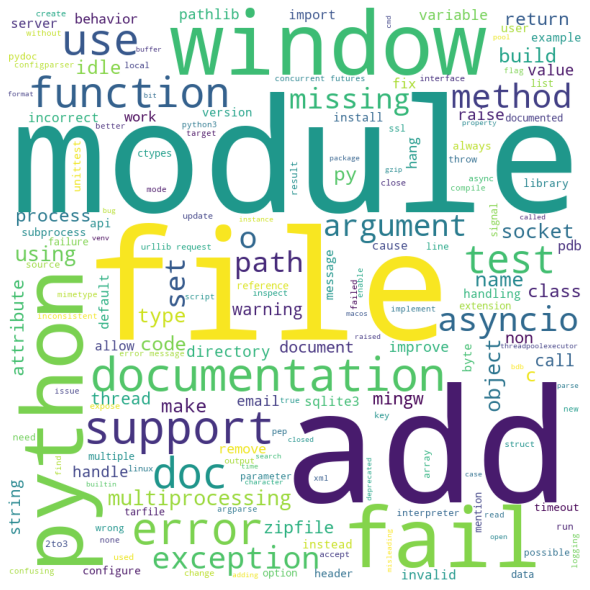

In [11]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(sentence)                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Check wich module is the most cited

In [12]:
from collections import defaultdict
module_counter = defaultdict(int)
for word in sentence.split(" "):
    for module in list_modules:
        if word == module:
            module_counter[module] += 1

In [13]:
[f for f in module_counter if module_counter[f] > 5]

['socket',
 'posix',
 'test',
 'locale',
 'zipfile',
 'pydoc',
 'argparse',
 'parser',
 'multiprocessing',
 'asyncio',
 'tests',
 'string',
 'ssl',
 'pdb',
 'types',
 'code',
 'subprocess',
 'signal',
 'warnings',
 'pathlib']

### Getting issues that mention the modules

In [14]:
from IPython.display import HTML

df['link'] = df['id'].apply(lambda x: '<a target="_blank" href="https://bugs.python.org/issue{0}">link</a>'.format(x))

In [15]:
df = df[df['title'].apply(lambda x: 'http' in x)].sort_values('activity', ascending=False)
HTML(df.to_html(escape=False))

,title,id,activity,status,link
1271,Expose http.cookiejar.split_header_words(),23498,2021-04-27.01:30:40,1,link
1210,Collapse sidebar issue on https://docs.python.org/3/,43590,2021-03-22.15:24:16,1,link
1147,Textwrap to conform to https://www.unicode.org/reports/tr14/tr14-45.html,41975,2021-02-22.14:17:30,1,link
1124,make test fails Lib/test/test_httpservers.py on 3.9.1,43128,2021-02-04.18:02:38,1,link
1028,More options to http.server & SimpleHTTPRequestHandler,42063,2020-11-19.20:27:46,1,link
857,Suggested change to http.server.HTTPServer to prevent socket reuse in Windows,41135,2020-06-27.04:21:05,1,link
832,Make http.server support SSL,40990,2020-06-16.22:45:41,1,link
563,"http.client should be ""runnable"" like http.server",38193,2019-09-16.22:02:08,1,link
539,test_httpservers hangs on an IPv6-only host,37898,2019-08-20.18:33:34,1,link
522,http.cookiejar.DefaultCookiePolicy should use current timestamp instead of last updated timestamp value for checking expiry,37246,2019-07-30.14:43:51,1,link


### Touched Issues

1. https://bugs.python.org/issue44104

In [16]:
df[df['title'].apply(lambda x: 'asyncio' in x)].sort_values('activity').sort_values

<bound method DataFrame.sort_values of Empty DataFrame
Columns: [title, id, activity, status, link]
Index: []>